# Advanced Regression Assignment on Surprise Housing <hr>

# Problem Statement

A US-based housing company named <b>Surprise Housing</b> has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia.

 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know:
- Which variables are significant in predicting the price of a house, and
- How well those variables describe the price of a house.

Also, determine the optimal value of lambda for ridge and lasso regression.

 + ### Business Goals

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.<hr>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

from statsmodels.stats.outliers_influence import variance_inflation_factor

import sklearn
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

## Understanding the data

 - ### Reading the data

In [2]:
df = pd.read_csv("train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

- ### Identifying the target variable

Since we need to figure out the variables that have a significant effect on the price of the house, we choose selling price as the target variable

 - ### Preparing the data

since there are about 80 variables, let's segregate the data

<ul><ul><li> <h3>numerical data

In [4]:
df_numerical = df.select_dtypes(include=['float64', 'int64'])
df_numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   MasVnrArea     1452 non-null   float64
 9   BsmtFinSF1     1460 non-null   int64  
 10  BsmtFinSF2     1460 non-null   int64  
 11  BsmtUnfSF      1460 non-null   int64  
 12  TotalBsmtSF    1460 non-null   int64  
 13  1stFlrSF       1460 non-null   int64  
 14  2ndFlrSF       1460 non-null   int64  
 15  LowQualFinSF   1460 non-null   int64  
 16  GrLivArea      1460 non-null   int64  
 17  BsmtFullBath   1460 non-null   int64  
 18  BsmtHalf

`LotFrontage` , `MasVnrArea` and `GarageYrBlt` seem to have null values. Let us assess them

In [5]:
print("LotFrontage\n\n", df.LotFrontage.describe(), "\n")
print("MasVnrArea\n\n", df.MasVnrArea.describe(), "\n")
print("GarageYrBlt\n\n", df.GarageYrBlt.describe(), "\n")

LotFrontage

 count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64 

MasVnrArea

 count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64 

GarageYrBlt

 count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64 



For `MasVnrArea` and `GarageYrBlt`, since only a relatively small amount of data is missing in each of these colums, we can choose to replace the missing values with the median of the data

In [6]:
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())
df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].median())
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].median())

In [7]:
print("LotFrontage\n\n", df.LotFrontage.describe(), "\n")
print("MasVnrArea\n\n", df.MasVnrArea.describe(), "\n")
print("GarageYrBlt\n\n", df.GarageYrBlt.describe(), "\n")

LotFrontage

 count    1460.000000
mean       69.863699
std        22.027677
min        21.000000
25%        60.000000
50%        69.000000
75%        79.000000
max       313.000000
Name: LotFrontage, dtype: float64 

MasVnrArea

 count    1460.000000
mean      103.117123
std       180.731373
min         0.000000
25%         0.000000
50%         0.000000
75%       164.250000
max      1600.000000
Name: MasVnrArea, dtype: float64 

GarageYrBlt

 count    1460.000000
mean     1978.589041
std        23.997022
min      1900.000000
25%      1962.000000
50%      1980.000000
75%      2001.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64 



In [8]:
df_numerical = df.select_dtypes(include=['float64', 'int64'])

Let's plot a correlation chart between the numerical variables to gain an understanding of the relations in the dataset

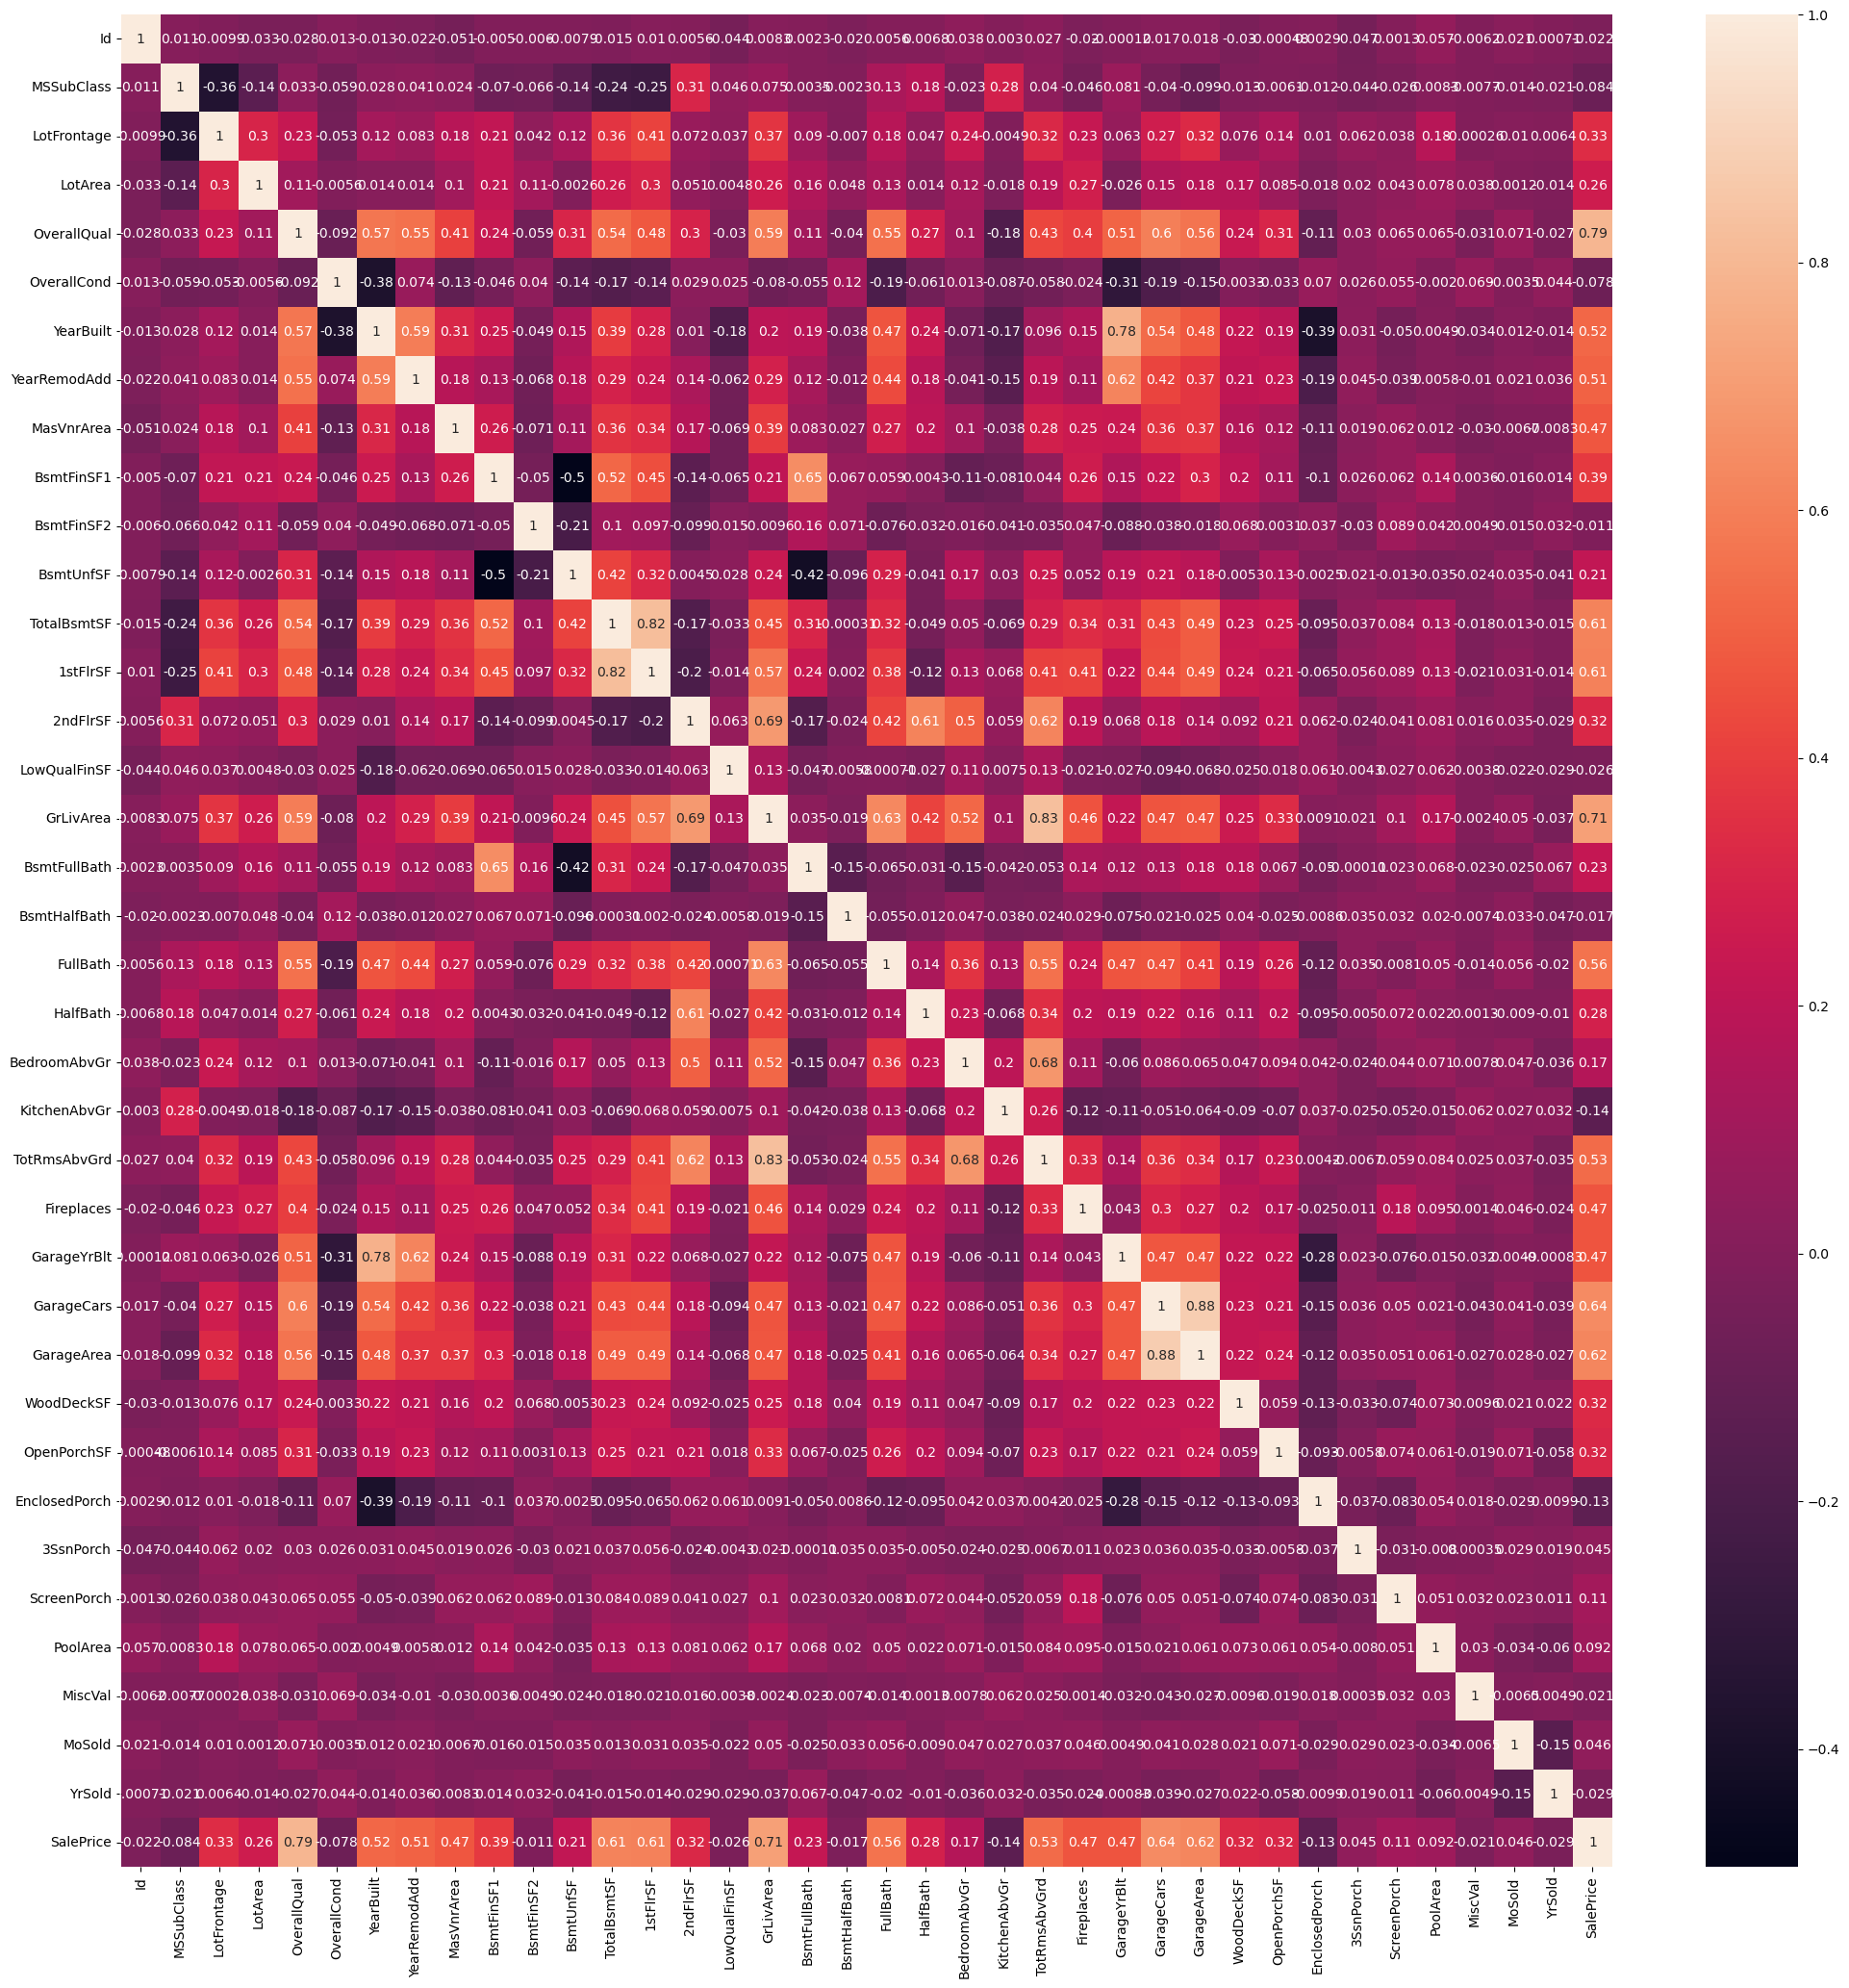

In [9]:
plt.figure(figsize=(25,25))
sns.heatmap(df_numerical.corr(), annot=True)
plt.show()

In [10]:
df_numerical.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.009921,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.051071,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.356718,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.023573,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.009921,-0.356718,1.000000,0.304522,0.234812,-0.053281,0.116685,0.083348,0.178469,0.214367,...,0.075542,0.137014,0.010287,0.061945,0.037655,0.180819,-0.000255,0.010451,0.006380,0.334771
LotArea,-0.033226,-0.139781,0.304522,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103321,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.234812,0.105806,1.000000,-0.091932,0.572323,0.550684,0.407252,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.053281,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.125694,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.116685,0.014228,0.572323,-0.375983,1.000000,0.592855,0.311600,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.083348,0.013788,0.550684,0.073741,0.592855,1.000000,0.176529,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.051071,0.023573,0.178469,0.103321,0.407252,-0.125694,0.311600,0.176529,1.000000,0.261256,...,0.159991,0.122528,-0.109907,0.019144,0.062248,0.011928,-0.029512,-0.006723,-0.008317,0.472614
BsmtFinSF1,-0.005024,-0.069836,0.214367,0.214103,0.239666,-0.046231,0.249503,0.128451,0.261256,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


Let's plot scatter plots to observe the relationships among these variables

<Figure size 1000x500 with 0 Axes>

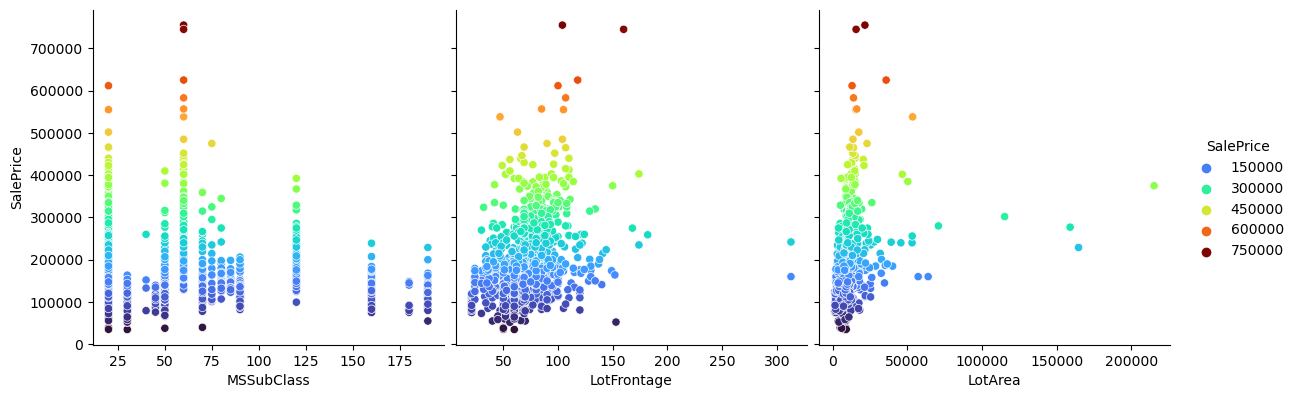

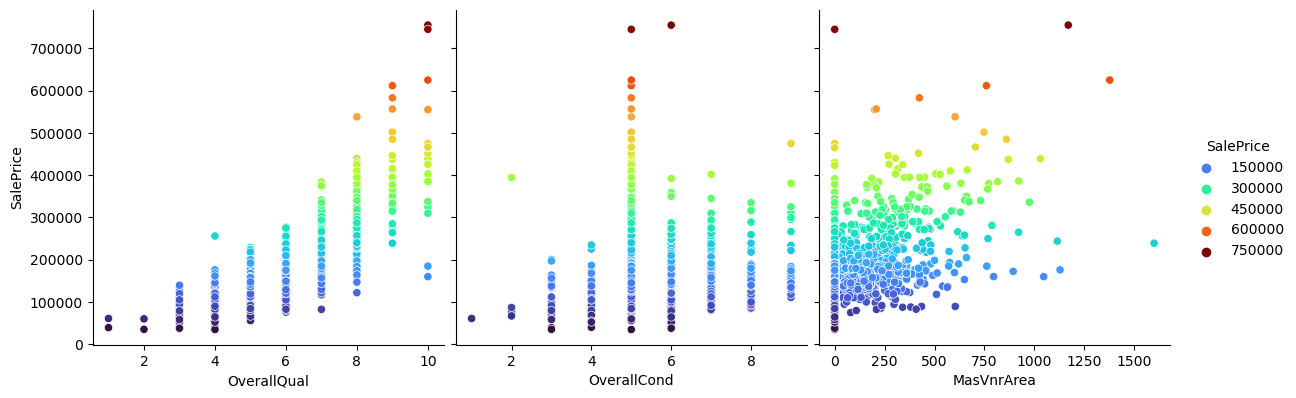

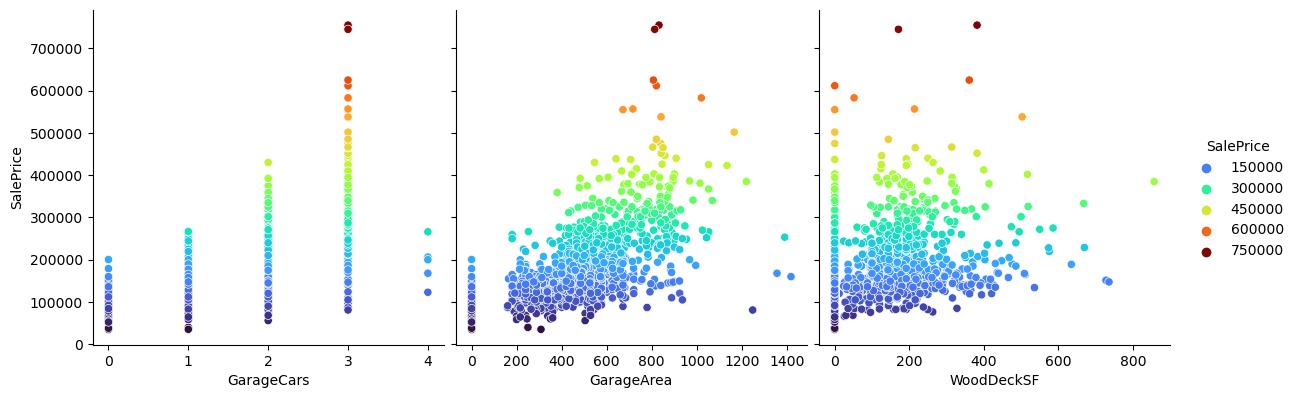

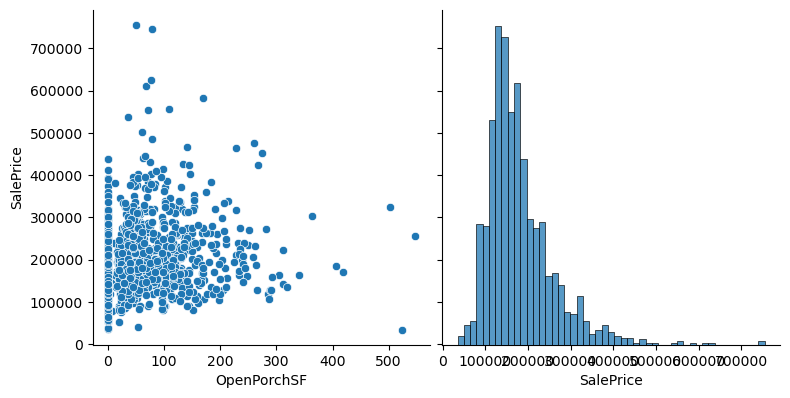

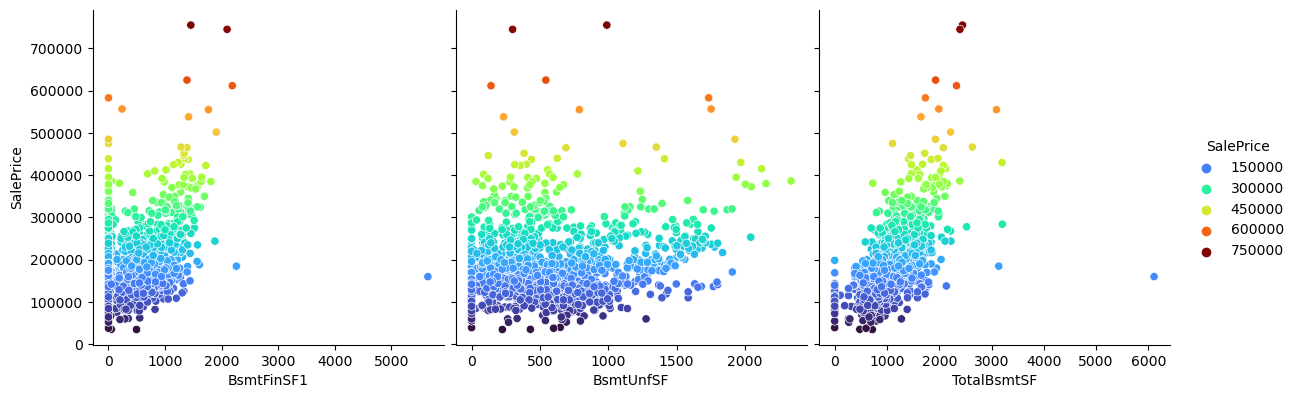

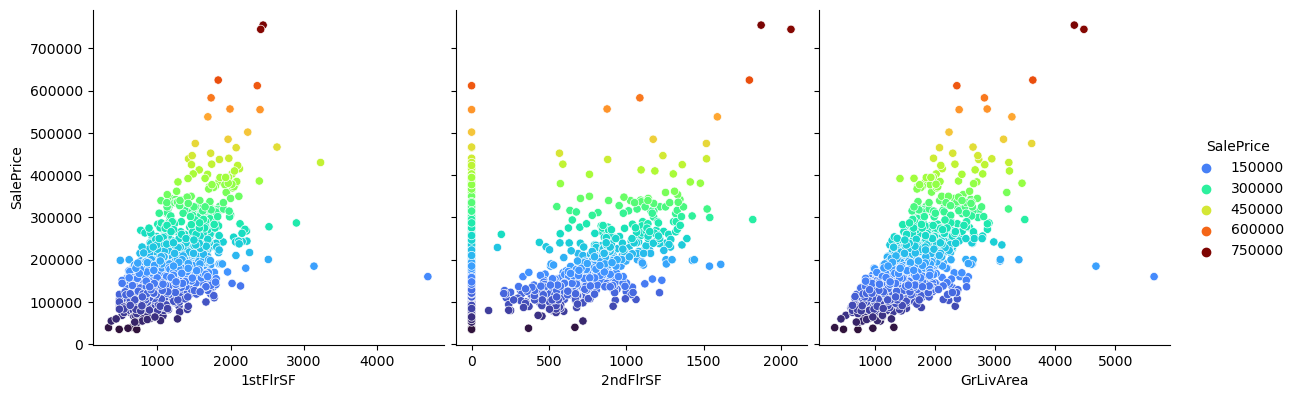

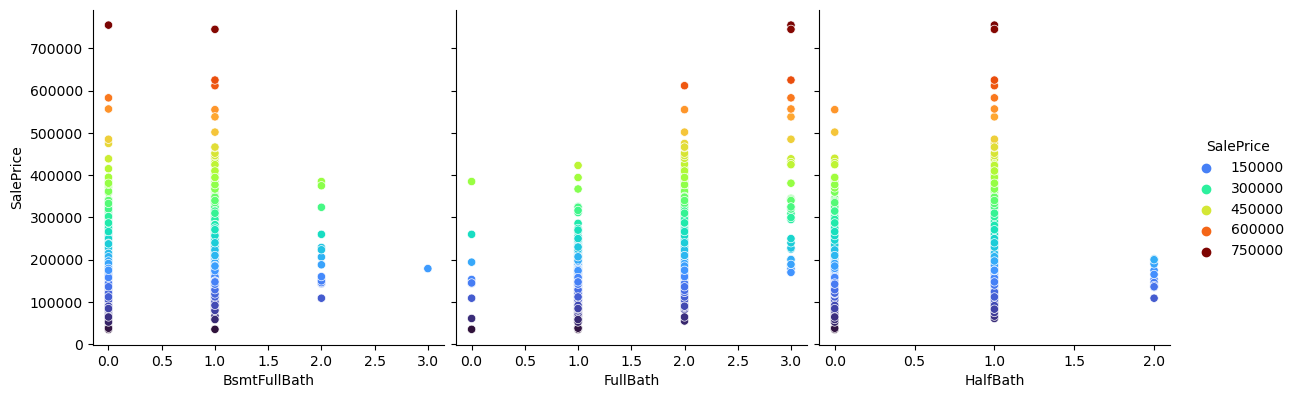

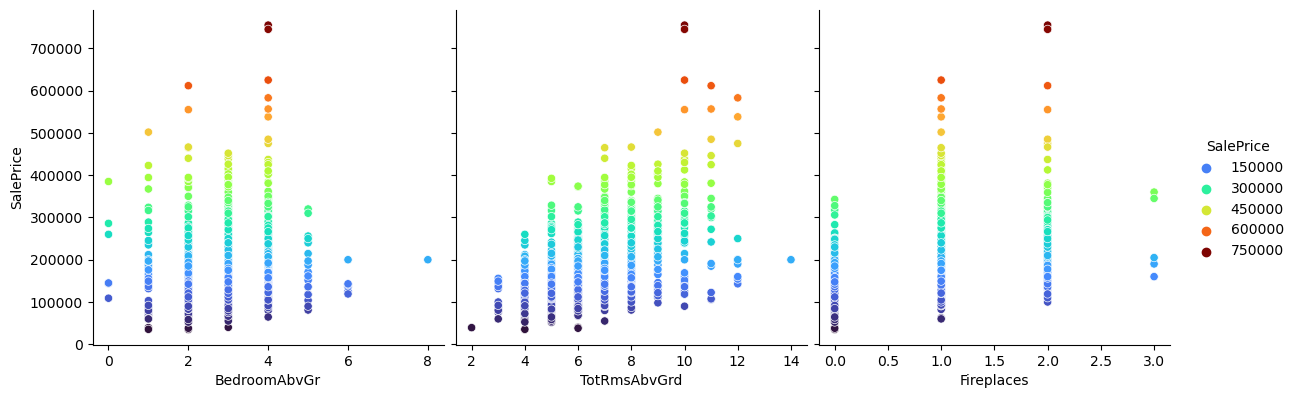

In [11]:
plt.figure(figsize=(10,5))
sns.pairplot(df, x_vars=['MSSubClass','LotFrontage','LotArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter', hue="SalePrice", palette="turbo")
sns.pairplot(df, x_vars=['OverallQual', 'OverallCond','MasVnrArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter', hue="SalePrice", palette="turbo")
sns.pairplot(df, x_vars=['GarageCars','GarageArea', 'WoodDeckSF'], y_vars='SalePrice',height=4, aspect=1,kind='scatter', hue="SalePrice", palette="turbo")
sns.pairplot(df, x_vars=['OpenPorchSF','SalePrice'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df, x_vars=['BsmtFinSF1', 'BsmtUnfSF','TotalBsmtSF'], y_vars='SalePrice',height=4, aspect=1,kind='scatter', hue="SalePrice", palette="turbo")
sns.pairplot(df, x_vars=['1stFlrSF','2ndFlrSF', 'GrLivArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter', hue="SalePrice", palette="turbo")
sns.pairplot(df, x_vars=['BsmtFullBath','FullBath', 'HalfBath'], y_vars='SalePrice',height=4, aspect=1,kind='scatter', hue="SalePrice", palette="turbo")
sns.pairplot(df, x_vars=['BedroomAbvGr','TotRmsAbvGrd', 'Fireplaces'], y_vars='SalePrice',height=4, aspect=1,kind='scatter', hue="SalePrice", palette="turbo")
plt.show()

<ul><ul><li> <h3>categorical data

In [12]:
df_categorical = df.select_dtypes(include=["object"])
df_categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   Alley          91 non-null     object
 3   LotShape       1460 non-null   object
 4   LandContour    1460 non-null   object
 5   Utilities      1460 non-null   object
 6   LotConfig      1460 non-null   object
 7   LandSlope      1460 non-null   object
 8   Neighborhood   1460 non-null   object
 9   Condition1     1460 non-null   object
 10  Condition2     1460 non-null   object
 11  BldgType       1460 non-null   object
 12  HouseStyle     1460 non-null   object
 13  RoofStyle      1460 non-null   object
 14  RoofMatl       1460 non-null   object
 15  Exterior1st    1460 non-null   object
 16  Exterior2nd    1460 non-null   object
 17  MasVnrType     1452 non-null   object
 18  ExterQual      1460 non-null

Seems like there are many colums with null values.

In [13]:
df.columns[df.isna().any()].tolist()

['Alley',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

<b>Upon inspecting these variables, we will notice that the type NA indicates the hose does not support this amenity/feature.</b> <br>
So let us replace null values with something meaningful and relevant to the dataset.

In [14]:
# Drop rows that are NA from MasVnrType and Electrical
df.dropna(subset =['MasVnrType','Electrical'], inplace=True)
print('\nAfter dropping MasVnrType and Electrical: ')
print(df.shape)


After dropping MasVnrType and Electrical: 
(1451, 81)


In [15]:
# Drop rows that are BsmtFinType2 = NA and BsmtFinType1 != NA
df.drop(df[(df.BsmtFinType2.isna()) & (df.BsmtFinType1.notna())].index, inplace=True)
print('\nAfter dropping BsmtFinType2 = NA and BsmtFinType1 != NA: ')
print(df.shape)


After dropping BsmtFinType2 = NA and BsmtFinType1 != NA: 
(1450, 81)


We can replace other missing values in the categorical colums with names of meaning, this can help us process the rows that once hade missing values with the message they intend to convey

In [16]:
cols={
    'Alley':'No_Access',
    'GarageType':'No_Garage',
    'GarageFinish':'No_Garage',
    'GarageQual':'No_Garage',
    'GarageCond':'No_Garage',
    'PoolQC':'No_Pool',
    'Fence':'No_Fence',
    'MiscFeature':'None',
    'FireplaceQu':'No_FirePlace',
    'BsmtQual':'No_Bsmnt',
    'BsmtCond':'No_Bsmnt',
    'BsmtExposure':'No_Bsmnt',
    'BsmtFinType1':'No_Bsmnt',
    'BsmtFinType2':'No_Bsmnt',
}

for i in cols:
    print('NA/nulls in '+i+' before replacing missing values : ' + str(df[i].isna().sum()))
    print(cols[i]+'  in '+i+' before replacing missing values : ' + str(df[i][df[i] == cols[i]].count()))
    
    df[i].fillna(cols[i], inplace=True)
    
    print('NA/nulls '+i+' after replacing missing values : ' + str(df[i].isna().sum()))
    print(cols[i]+'  in '+i+' after replacing missing values : ' + str(df[i][df[i] == cols[i]].count()))
    print('\n')

df.shape

NA/nulls in Alley before replacing missing values : 1360
No_Access  in Alley before replacing missing values : 0
NA/nulls Alley after replacing missing values : 0
No_Access  in Alley after replacing missing values : 1360


NA/nulls in GarageType before replacing missing values : 81
No_Garage  in GarageType before replacing missing values : 0
NA/nulls GarageType after replacing missing values : 0
No_Garage  in GarageType after replacing missing values : 81


NA/nulls in GarageFinish before replacing missing values : 81
No_Garage  in GarageFinish before replacing missing values : 0
NA/nulls GarageFinish after replacing missing values : 0
No_Garage  in GarageFinish after replacing missing values : 81


NA/nulls in GarageQual before replacing missing values : 81
No_Garage  in GarageQual before replacing missing values : 0
NA/nulls GarageQual after replacing missing values : 0
No_Garage  in GarageQual after replacing missing values : 81


NA/nulls in GarageCond before replacing missing valu

(1450, 81)

In [17]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,...,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000
mean,729.647586,56.958621,69.835172,10507.706897,6.092414,5.580000,1971.070345,1984.746897,103.624138,441.804828,...,94.477931,46.454483,21.967586,3.433103,15.164828,2.777931,43.788966,6.316552,2007.814483,180552.808276
std,421.754746,42.353857,22.048438,9996.433973,1.381035,1.113695,30.189039,20.652271,181.100181,455.173950,...,125.455597,66.071680,61.126584,29.416948,55.935396,40.315051,497.818831,2.699552,1.329471,79292.967382
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.250000,20.000000,60.000000,7536.250000,5.000000,5.000000,1954.000000,1966.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129900.000000
50%,729.500000,50.000000,69.000000,9470.500000,6.000000,5.000000,1972.000000,1993.000000,0.000000,381.000000,...,0.000000,24.500000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162250.000000
75%,1094.750000,70.000000,79.000000,11600.000000,7.000000,6.000000,2000.000000,2004.000000,165.750000,706.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213875.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1450 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1450 non-null   int64  
 1   MSSubClass     1450 non-null   int64  
 2   MSZoning       1450 non-null   object 
 3   LotFrontage    1450 non-null   float64
 4   LotArea        1450 non-null   int64  
 5   Street         1450 non-null   object 
 6   Alley          1450 non-null   object 
 7   LotShape       1450 non-null   object 
 8   LandContour    1450 non-null   object 
 9   Utilities      1450 non-null   object 
 10  LotConfig      1450 non-null   object 
 11  LandSlope      1450 non-null   object 
 12  Neighborhood   1450 non-null   object 
 13  Condition1     1450 non-null   object 
 14  Condition2     1450 non-null   object 
 15  BldgType       1450 non-null   object 
 16  HouseStyle     1450 non-null   object 
 17  OverallQual    1450 non-null   int64  
 18  OverallC

In [19]:
df_categorical = df_categorical.fillna('None')

In [20]:
df[df_categorical.columns] = df_categorical

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1450 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1450 non-null   int64  
 1   MSSubClass     1450 non-null   int64  
 2   MSZoning       1450 non-null   object 
 3   LotFrontage    1450 non-null   float64
 4   LotArea        1450 non-null   int64  
 5   Street         1450 non-null   object 
 6   Alley          1450 non-null   object 
 7   LotShape       1450 non-null   object 
 8   LandContour    1450 non-null   object 
 9   Utilities      1450 non-null   object 
 10  LotConfig      1450 non-null   object 
 11  LandSlope      1450 non-null   object 
 12  Neighborhood   1450 non-null   object 
 13  Condition1     1450 non-null   object 
 14  Condition2     1450 non-null   object 
 15  BldgType       1450 non-null   object 
 16  HouseStyle     1450 non-null   object 
 17  OverallQual    1450 non-null   int64  
 18  OverallC

Now that the data is cleaned, we can proceed.

<hr>

## Building the Model

In [22]:
# Create X and Y vectors
X = df.drop(['Id','SalePrice'], axis = 1)
Y = df['SalePrice']
len(X.columns)

79

Creating Dummy Variables

In [23]:
df_categorical = X.select_dtypes(include=["object"])
df_dummies = pd.get_dummies(df_categorical, drop_first=True)
df_dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,1,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,1,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [24]:
#replace X
X = X.drop(list(df_categorical.columns), axis=1)
X = pd.concat([X, df_dummies], axis=1)
len(X.columns)

259

We can now split the data into train and test splits

In [25]:
X_train,X_test,y_train, y_test = train_test_split(X,Y, train_size = 0.7, test_size = 0.3, random_state = 10)

In [26]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train

array([[0.23529412, 0.2739726 , 0.05958796, ..., 0.        , 0.        ,
        1.        ],
       [0.35294118, 0.35273973, 0.04694342, ..., 0.        , 1.        ,
        0.        ],
       [0.23529412, 0.16438356, 0.06233861, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.17647059, 0.11986301, 0.06195034, ..., 0.        , 1.        ,
        0.        ],
       [0.35294118, 0.21917808, 0.04080592, ..., 0.        , 0.        ,
        0.        ],
       [0.35294118, 0.21917808, 0.03682965, ..., 0.        , 1.        ,
        0.        ]])

Recursive Feature Elimination

We can start with 25 variables

In [27]:
X_train.shape

(1014, 259)

In [28]:
# Running RFE with the output number of the variable equal to 25
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=25)
rfe = rfe.fit(X_train, y_train)

y_pred = rfe.predict(X_test)
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print(r2)

0.7451378546963546


In [29]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

y_pred = rfe.predict(X_test)
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print(r2)

0.69346524864484


In [30]:
# Running RFE with the output number of the variable equal to 50
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=50)
rfe = rfe.fit(X_train, y_train)

y_pred = rfe.predict(X_test)
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print(r2)

0.77987847270553


Observe Rankings

In [31]:
list(zip(X.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 69),
 ('LotFrontage', True, 1),
 ('LotArea', True, 1),
 ('OverallQual', False, 24),
 ('OverallCond', True, 1),
 ('YearBuilt', True, 1),
 ('YearRemodAdd', False, 106),
 ('MasVnrArea', False, 43),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 196),
 ('BsmtHalfBath', False, 144),
 ('FullBath', False, 185),
 ('HalfBath', False, 195),
 ('BedroomAbvGr', True, 1),
 ('KitchenAbvGr', True, 1),
 ('TotRmsAbvGrd', False, 44),
 ('Fireplaces', False, 78),
 ('GarageYrBlt', False, 66),
 ('GarageCars', True, 1),
 ('GarageArea', False, 167),
 ('WoodDeckSF', False, 37),
 ('OpenPorchSF', False, 164),
 ('EnclosedPorch', False, 203),
 ('3SsnPorch', False, 57),
 ('ScreenPorch', False, 56),
 ('PoolArea', True, 1),
 ('MiscVal', True, 1),
 ('MoSold', False, 114),
 ('YrSold', False, 128),
 ('MSZoning_FV', Fal

The 50 Columns selected by RFE are:

In [32]:
support = X.columns[rfe.support_]
support

Index(['LotFrontage', 'LotArea', 'OverallCond', 'YearBuilt', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr',
       'GarageCars', 'PoolArea', 'MiscVal', 'Street_Pave', 'LandSlope_Sev',
       'Neighborhood_StoneBr', 'Condition1_RRNe', 'Condition2_PosN',
       'RoofStyle_Gambrel', 'RoofStyle_Shed', 'RoofMatl_Tar&Grv',
       'RoofMatl_WdShngl', 'Exterior2nd_Stone', 'ExterQual_Gd', 'ExterQual_TA',
       'Foundation_Wood', 'BsmtQual_None', 'BsmtCond_None', 'BsmtCond_Po',
       'BsmtFinType1_None', 'BsmtFinType2_None', 'Electrical_Mix',
       'KitchenQual_Fa', 'KitchenQual_Gd', 'KitchenQual_TA', 'Functional_Sev',
       'GarageQual_Po', 'GarageCond_None', 'GarageCond_Po', 'PoolQC_Fa',
       'PoolQC_Gd', 'PoolQC_None', 'MiscFeature_None', 'MiscFeature_Shed',
       'MiscFeature_TenC', 'SaleType_Oth'],
      dtype='object')

Selectiing the RFE Columns

In [33]:
X_rfe = X[support]
X_rfe

,LotFrontage,LotArea,OverallCond,YearBuilt,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,GarageQual_Po,GarageCond_None,GarageCond_Po,PoolQC_Fa,PoolQC_Gd,PoolQC_None,MiscFeature_None,MiscFeature_Shed,MiscFeature_TenC,SaleType_Oth
0,65.0,8450,5,2003,706,0,150,856,856,854,...,0,0,0,0,0,1,1,0,0,0
1,80.0,9600,8,1976,978,0,284,1262,1262,0,...,0,0,0,0,0,1,1,0,0,0
2,68.0,11250,5,2001,486,0,434,920,920,866,...,0,0,0,0,0,1,1,0,0,0
3,60.0,9550,5,1915,216,0,540,756,961,756,...,0,0,0,0,0,1,1,0,0,0
4,84.0,14260,5,2000,655,0,490,1145,1145,1053,...,0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,5,1999,0,0,953,953,953,694,...,0,0,0,0,0,1,1,0,0,0
1456,85.0,13175,6,1978,790,163,589,1542,2073,0,...,0,0,0,0,0,1,1,0,0,0
1457,66.0,9042,9,1941,275,0,877,1152,1188,1152,...,0,0,0,0,0,1,0,1,0,0
1458,68.0,9717,6,1950,49,1029,0,1078,1078,0,...,0,0,0,0,0,1,1,0,0,0


Doesn't seem like RFE is providing us with great scores

In [34]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('r2_score_train    :  '+ str(r2_train_lr))
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('r2_score_test     :  '+str(r2_test_lr))
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('RSS_train         :  '+ str(rss1_lr))
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('RSS_test          :  '+ str(rss2_lr))
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('MSE_train         :  '+ str(mse_train_lr))
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('MSE_test          :  '+ str(mse_test_lr))
metric.append(mse_test_lr**0.5)

r2_score_train    :  0.9447704110345438
r2_score_test     :  -5.392528819357918e+21
RSS_train         :  343401421835.0
RSS_test          :  1.55941322828105e+34
MSE_train         :  338660179.3244576
MSE_test          :  3.584857996048391e+31


- Clearly, Linear Regression does not fit the dataset properly. <br> Let us explore Ridge and Lasso Regression <hr>

 - ### Ridge Regression

In [35]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
ridge_reg = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_reg.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [36]:
print('The Best value of Alpha is: ',ridge_reg.best_params_)
print('The Best score achieved : ',ridge_reg.best_score_)

The Best value of Alpha is:  {'alpha': 5.0}
The Best score achieved :  -17467.029525078928


In [37]:
# with alpha = 5
ridge = Ridge(alpha=5)

ridge.fit(X_train, y_train)

y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('r2_score_train    :  '+ str(r2_train_lr))
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('r2_score_test     :  '+str(r2_test_lr))
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('RSS_train         :  '+ str(rss1_lr))
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('RSS_test          :  '+ str(rss2_lr))
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('MSE_train         :  '+ str(mse_train_lr))
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('MSE_test          :  '+ str(mse_test_lr))
metric2.append(mse_test_lr**0.5)

r2_score_train    :  0.9169336808161446
r2_score_test     :  0.9031028009336557
RSS_train         :  516482064209.7687
RSS_test          :  280207633689.4405
MSE_train         :  509351148.1358665
MSE_test          :  644155479.7458402


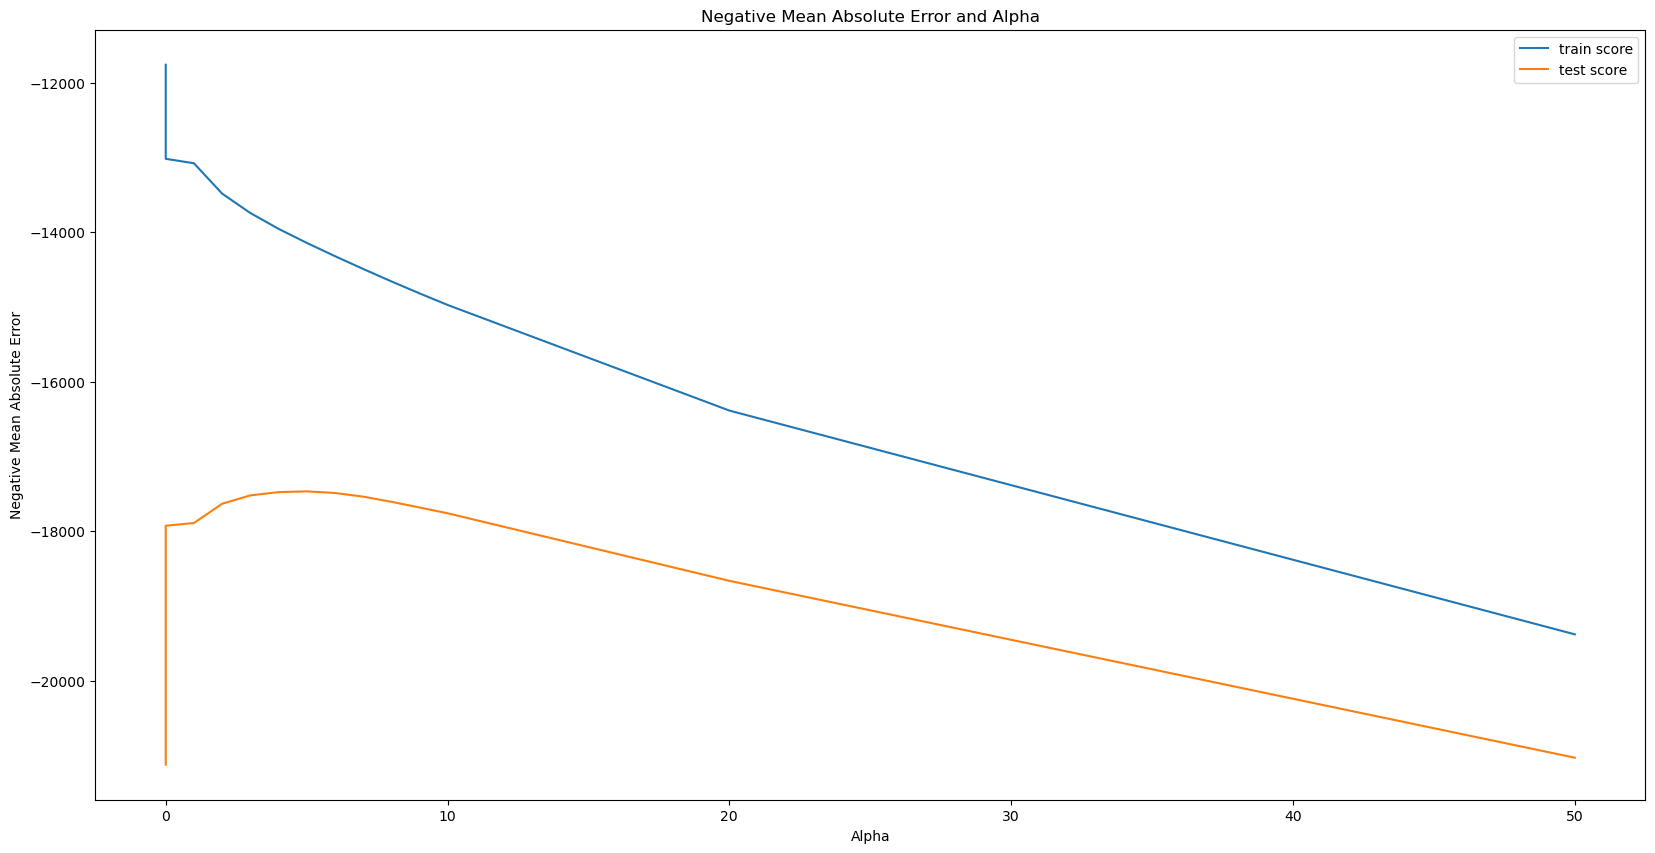

In [52]:

ridge_observation = pd.DataFrame(ridge_reg.cv_results_)
ridge_observation = ridge_observation[ridge_observation['param_alpha']<=50]

ridge_observation['param_alpha'] = ridge_observation['param_alpha'].astype('int32')
plt.figure(figsize=(20,10))
plt.plot(ridge_observation['param_alpha'], ridge_observation['mean_train_score'])
plt.plot(ridge_observation['param_alpha'], ridge_observation['mean_test_score'])
plt.xlabel('Alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and Alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

<hr>

 - ### Lasso Regression

In [39]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [40]:
print(model_cv.best_params_)

{'alpha': 100}


In [41]:
lasso = Lasso(alpha=100)
        
lasso.fit(X_train, y_train) 

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('r2_score_train    :  '+ str(r2_train_lr))
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('r2_score_test     :  '+ str(r2_test_lr))
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('RSS_train         :  '+ str(rss1_lr))
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('RSS_test          :  '+ str(rss2_lr))
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('MSE_train         :  '+ str(mse_train_lr))
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('MSE_test         :  '+ str(mse_test_lr))
metric3.append(mse_test_lr**0.5)

r2_score_train    :  0.9263344114521915
r2_score_test     :  0.8845341879030792
RSS_train         :  458031072138.73425
RSS_test          :  333904408914.39075
MSE_train         :  451707171.73445195
MSE_test         :  767596342.3319328


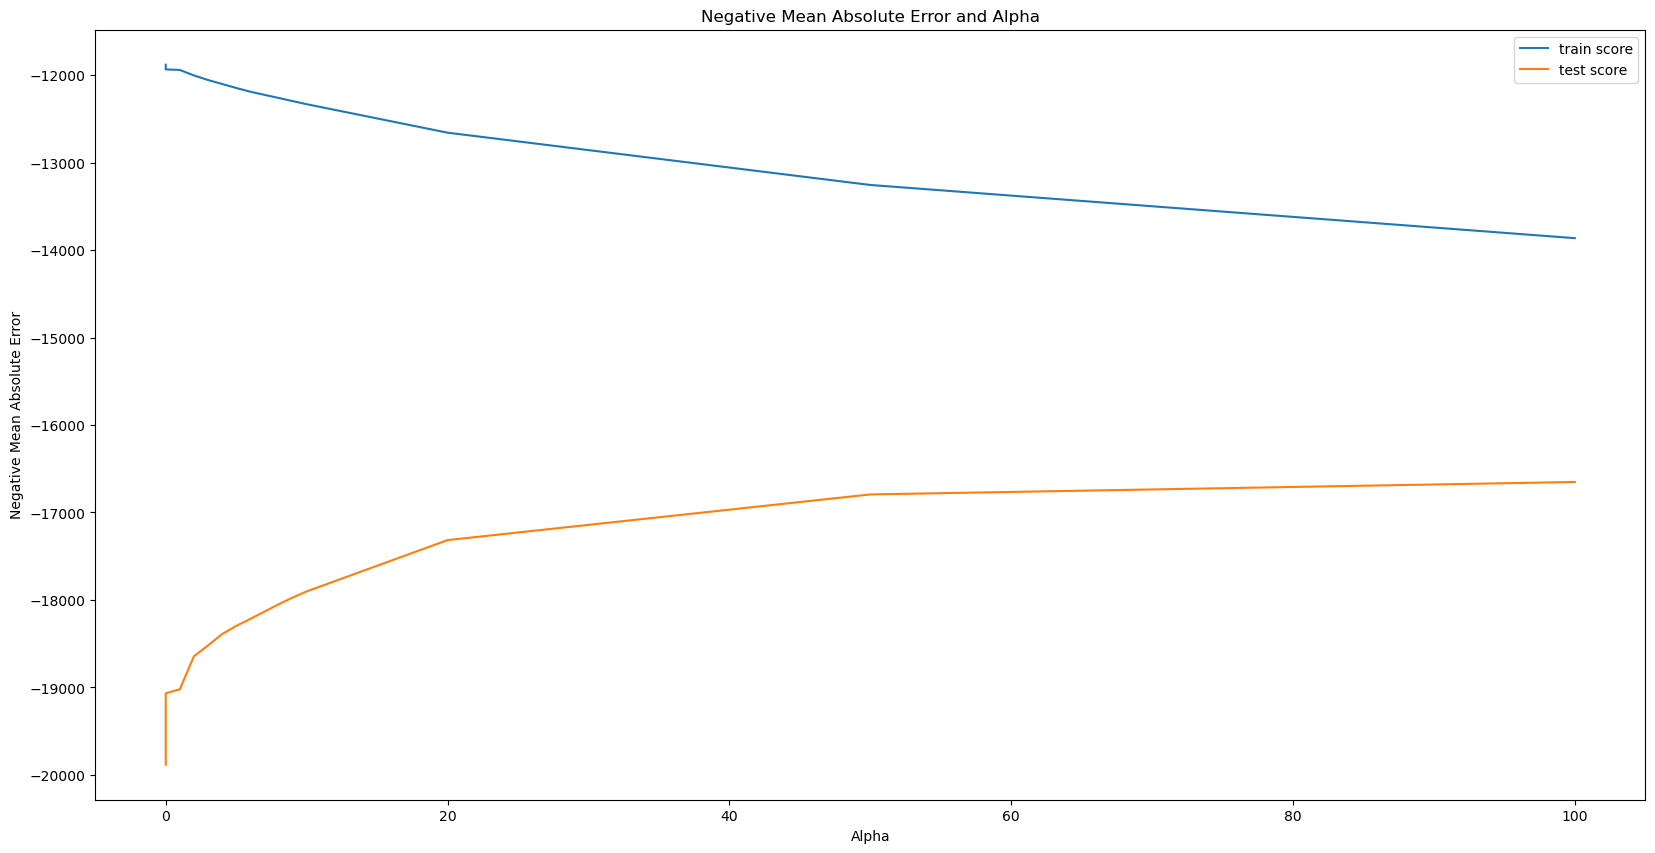

In [51]:
lasso_observation = pd.DataFrame(model_cv.cv_results_)
lasso_observation = lasso_observation[lasso_observation['param_alpha']<=400]
lasso_observation.head()

lasso_observation['param_alpha'] = lasso_observation['param_alpha'].astype('int32')
plt.figure(figsize=(20,10))
plt.plot(lasso_observation['param_alpha'], lasso_observation['mean_train_score'])
plt.plot(lasso_observation['param_alpha'], lasso_observation['mean_test_score'])
plt.xlabel('Alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and Alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

<hr>
Let us represent our models on a table

In [56]:
model_representation = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

linear_metric = pd.DataFrame(model_representation ,columns = ['Metric', 'Linear Regression'] )

ridge_metric = pd.Series(metric2, name = 'Ridge Regression')
lasso_metric = pd.Series(metric3, name = 'Lasso Regression')

final_representation = pd.concat([linear_metric, ridge_metric, lasso_metric], axis = 1)

final_representation

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.447704e-01,9.169337e-01,9.263344e-01
1,R2 Score (Test),-5.392529e+21,9.031028e-01,8.845342e-01
2,RSS (Train),3.434014e+11,5.164821e+11,4.580311e+11
3,RSS (Test),1.559413e+34,2.802076e+11,3.339044e+11
4,MSE (Train),1.840272e+04,2.256881e+04,2.125340e+04
5,MSE (Test),5.987368e+15,2.538022e+04,2.770553e+04


From the given metrics, we notice that:<br> 
> <b>Ridge</b> regression gives us an $R^2$ Value of $0.91$ and $0.90$ and <br> 
> <b>Lasso</b> Regression gives us an $R^2$ Value of $0.92$ and $0.88$ <br> 

for train and test data respectively

Taking a look at the coefficients

In [54]:
coefficients = pd.DataFrame(index=X.columns)
coefficients.rows = X.columns
coefficients['Linear'] = lm.coef_
coefficients['Ridge'] = ridge.coef_
coefficients['Lasso'] = lasso.coef_
pd.set_option('display.max_rows', None)
coefficients.head(50)

,Linear,Ridge,Lasso
MSSubClass,-7.704826e+03,-15429.345935,-21052.740906
LotFrontage,2.963196e+04,15915.056343,7042.558665
LotArea,1.718409e+05,23709.476546,42272.036850
OverallQual,6.102511e+04,51626.381061,74597.437846
OverallCond,4.503338e+04,26666.805790,35400.666111
YearBuilt,5.903628e+04,11602.488160,27861.023677
YearRemodAdd,4.213187e+03,8489.093231,7422.731978
MasVnrArea,1.391953e+04,13737.606102,8414.246457
BsmtFinSF1,8.804354e+16,35601.696543,33580.179415
BsmtFinSF2,5.742309e+16,10997.455401,0.000000


In [45]:
coefficients.Lasso.sort_values(ascending=False).head(15)

GrLivArea               144515.739329
TotalBsmtSF              77563.813477
OverallQual              74597.437846
RoofMatl_WdShngl         56779.050725
2ndFlrSF                 53217.611799
LotArea                  42272.036850
1stFlrSF                 42216.296409
Neighborhood_StoneBr     38549.598892
OverallCond              35400.666111
BsmtFinSF1               33580.179415
Neighborhood_NoRidge     31027.064580
YearBuilt                27861.023677
GarageCars               21165.065529
SaleType_New             19328.090678
Neighborhood_Somerst     18598.863871
Name: Lasso, dtype: float64

In [47]:
print("Total count of variables                : ", (coefficients.Lasso.count()))
print("Number of variables eliminated by Lasso : ", (coefficients.Lasso.values == 0).sum())

Total count of variables                :  259
Number of variables eliminated by Lasso :  157


In [48]:
coefficients.Ridge.sort_values(ascending=False).head(15)

GrLivArea               53150.808389
OverallQual             51626.381061
2ndFlrSF                50859.558922
1stFlrSF                45147.060057
TotalBsmtSF             43081.797595
Neighborhood_StoneBr    38437.078380
RoofMatl_WdShngl        37894.783876
BsmtFinSF1              35601.696543
Neighborhood_NoRidge    30483.143987
TotRmsAbvGrd            28740.267323
Fireplaces              27961.815755
OverallCond             26666.805790
LotArea                 23709.476546
GarageArea              22022.763521
GarageCars              21945.354455
Name: Ridge, dtype: float64

## Drawing a Conclusion

From our research,<br>
we noticed that Simple Linear Regression did not provide us with a satisfactory model. <br>
<br><br>However,<br> With the help of other regression techniques, we can come to passable conclusions.<br><br>
Both Ridge and Lasso Regression techniques provide us with models that describe the trends in the dataset fairly well.

> <b>Ridge</b> regression gives us an $R^2$ Value of $0.91$ and $0.90$ at $\lambda = 5$ and, <br> 
> <b>Lasso</b> Regression gives us an $R^2$ Value of $0.92$ and $0.88$ at $\lambda = 100$<br> 
> for train and test data respectively
<br>

It would seem that Ridge regression slightly surpasses Lasso regression only because it performs marginally better on the unseen/test data, however, Lasso regression does eliminate several variables and simplifies the model. <br> Yet, both models perform relatively well. It will come down to the business requirements to decide which model can be used. 
<br><br>
As far as the Business requirements go, Ridge regression suggests using the variables : 

1. `GrLivArea`    : Above grade (ground) living area square feet
2. `OverallQual`  : Rates the overall material and finish of the house
3. `2ndFlrSF`     : Second floor square feet
4. `1stFlrSF`     : First Floor square feet
5. `TotalBsmtSF`  : Total square feet of basement area

With 259 variable model complexity
<br><br>
And Lasso Regression considers using the variables:

1. `GrLivArea` : Above grade (ground) living area square feet
2. `TotalBsmtSF` : Total square feet of basement area
3. `OverallQual` : Rates the overall material and finish of the house
4. `RoofMatl_WdShngl` : If the roof materials consists of Wood Shingles
5. `2ndFlrSF` : Second floor square feet

With 157 variable model complexity

<hr><hr>

##### Subjective Question Analysis

Re-Creating the model after removing the top 5 features

In [67]:
X_train,X_test,y_train, y_test = train_test_split(X,Y, train_size = 0.7, test_size = 0.3, random_state = 10)
print(X_train.shape)
print(X_test.shape)

(1014, 259)
(435, 259)


In [68]:
X_train_Notop5=X_train.drop(['GrLivArea','TotalBsmtSF','OverallQual','RoofMatl_WdShngl','2ndFlrSF'], axis =1)
X_test_Notop5=X_test.drop(['GrLivArea','TotalBsmtSF','OverallQual','RoofMatl_WdShngl','2ndFlrSF'], axis =1)
print(X_train_Notop5.shape)
print(X_test_Notop5.shape)

(1014, 254)
(435, 254)


In [69]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_Notop5, y_train)

print(model_cv.best_params_)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
{'alpha': 100}


In [70]:
alpha =100

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_Notop5, y_train) 

y_pred_train = lasso.predict(X_train_Notop5)
y_pred_test = lasso.predict(X_test_Notop5)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('r2_score_train    :  '+ str(r2_train_lr))
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('r2_score_test     :  '+ str(r2_test_lr))
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('RSS_train         :  '+ str(rss1_lr))
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('RSS_test          :  '+ str(rss2_lr))
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('MSE_train         :  '+ str(mse_train_lr))
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('MSE_train         :  '+ str(mse_test_lr))
metric3.append(mse_test_lr**0.5)

r2_score_train    :  0.9138389022659877
r2_score_test     :  0.8745096012277813
RSS_train         :  535724491580.5939
RSS_test          :  362893541088.1355
MSE_train         :  528327900.9670551
MSE_train         :  834238025.4899666


In [71]:
ridge = Ridge()
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_Notop5, y_train) 
print(model_cv.best_params_)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
{'alpha': 10.0}


In [72]:
alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_Notop5, y_train)

y_pred_train = ridge.predict(X_train_Notop5)
y_pred_test = ridge.predict(X_test_Notop5)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('r2_score_train    :  '+ str(r2_train_lr))
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('r2_score_test     :  '+str(r2_test_lr))
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('RSS_train         :  '+ str(rss1_lr))
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('RSS_test          :  '+ str(rss2_lr))
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('MSE_train         :  '+ str(mse_train_lr))
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('MSE_test          :  '+ str(mse_test_lr))
metric2.append(mse_test_lr**0.5)

r2_score_train    :  0.9000757959170382
r2_score_test     :  0.8948100290648543
RSS_train         :  621299459231.5695
RSS_test          :  304188698203.9288
MSE_train         :  612721360.1889246
MSE_test          :  699284363.6871926


In [74]:
#Lasso R2 score is still better than Ridge and feature selection is also there. so we will pick the next top 5 from Lasso
X_Notop5=X.drop(['GrLivArea','TotalBsmtSF','OverallQual','RoofMatl_WdShngl','2ndFlrSF'], axis =1)
betas = pd.DataFrame(index=X_Notop5.columns)
betas['Lasso'] = lasso.coef_
betas["Ridge"] = ridge.coef_
betas.Lasso.sort_values(ascending=False)

Neighborhood_StoneBr      45766.355860
Neighborhood_NoRidge      40582.379187
Neighborhood_Crawfor      21439.114076
Neighborhood_Somerst      15808.365014
Functional_Typ            15008.305036
Neighborhood_NridgHt      14779.974646
GarageType_BuiltIn        13947.062037
HouseStyle_2Story         13650.385685
SaleType_New              12408.886684
LandContour_HLS           11966.546579
Exterior1st_BrkFace       10859.712885
FullBath                   9837.484398
Fireplaces                 9506.506280
SaleCondition_Normal       9117.375997
Condition1_Norm            8970.297732
HouseStyle_2.5Fin          8870.334910
HalfBath                   8826.050325
BsmtExposure_Gd            8487.593413
Exterior2nd_ImStucc        8039.752837
OverallCond                6956.065411
Neighborhood_BrkSide       6207.001903
TotRmsAbvGrd               5797.757567
HouseStyle_2.5Unf          5459.720663
BsmtFinType1_GLQ           4685.994721
LotConfig_CulDSac          4352.368142
LotShape_IR2             

In [75]:
betas.Ridge.sort_values(ascending=False)

Neighborhood_StoneBr     32022.979911
Neighborhood_NoRidge     26898.109885
LandContour_HLS          15157.267247
Neighborhood_Crawfor     14890.445261
Condition2_Norm          14558.374992
Neighborhood_NridgHt     12554.166083
Fireplaces               12320.625042
Functional_Typ           12232.634763
Exterior2nd_ImStucc      12087.131908
GarageType_BuiltIn       11206.877810
HouseStyle_2Story        10913.748366
Condition1_Norm          10574.721257
Exterior1st_BrkFace      10077.313165
HalfBath                  9413.686156
Neighborhood_Somerst      9243.376330
FullBath                  8770.196215
SaleCondition_Normal      8734.426125
HouseStyle_2.5Fin         8661.409702
HouseStyle_2.5Unf         7977.774300
SaleType_New              7484.784471
Condition2_PosA           7397.061992
BsmtExposure_Gd           7341.380380
LotShape_IR2              7266.318808
OverallCond               7146.124232
BsmtFinType1_GLQ          6779.965479
TotRmsAbvGrd              6703.426684
MSZoning_FV 